### **Notebook to test the Distortion Classification Class**

In [17]:
path = '/content/drive/MyDrive/USP/Tesis/POC_Flask'
!cp -r '{path}' .

In [ ]:
import os
import cv2
from tensorflow.keras.models import load_model
from POC_Flask.src.tools import Tools

In [ ]:
# Dir Path
dir_path = os.path.dirname(os.path.abspath('POC_Flask/models'))

In [ ]:
# Load models
model_128 = load_model(os.path.join(dir_path,'models/model_128'))
model_256 = load_model(os.path.join(dir_path,'models/model_256'))

In [ ]:
# Load Image
file_path = os.path.join(dir_path, 'examples/Face_JoseAngel_Live (1).jpg')
img = cv2.imread(file_path)

In [ ]:
# Instatiate tools class
tools = Tools()
ready, size = tools.image_preprocess(img)
if size == 256:
    results = tools.get_results(model_256, ready)
elif size == 128:
    results = tools.get_results(model_128, ready)
else:
    msg = '[ERROR] Image size unsupported'
    print(msg)

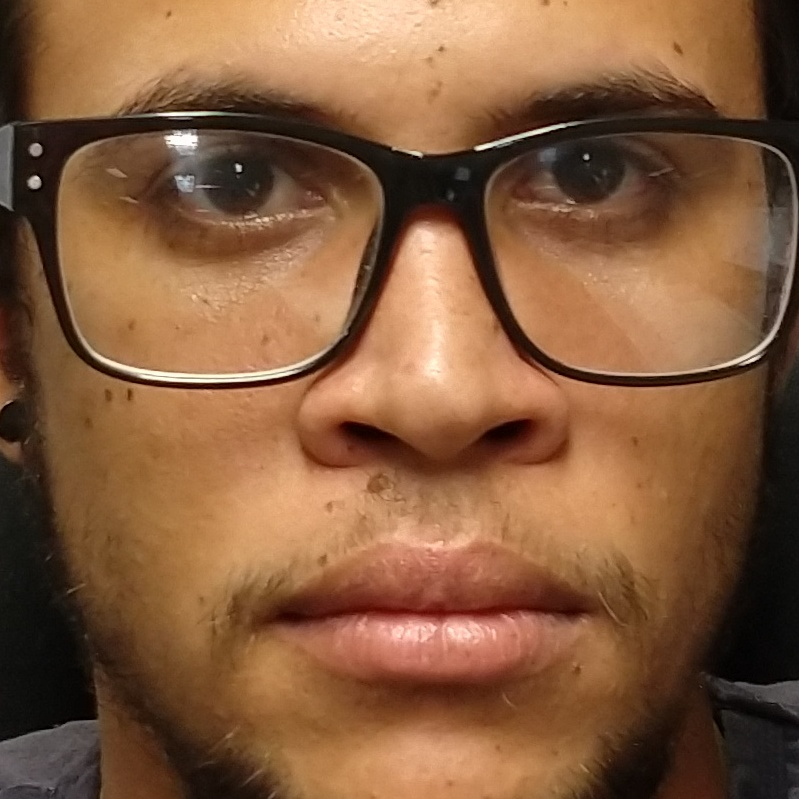

In [ ]:
from IPython.display import Image
Image(file_path)

In [ ]:
# Display results
try:
  for cont, dic in enumerate(results):
    if cont != 0:
      print('\n')
    for key, info in dic.items():
      print(str(key) + ':' + ' ' + str(info))
except Exception as e:
  print('Error while classifying the image: ', e)


Main Label: Clean
Probability: 0.4254723
Info: Image without distortions


Secundary Label: JPEG Compression Level 1
Probability: 0.23188278
Info: Image with artifacts related to JPEG compression with quality factors = [80, 35]


Secundary Label: Gaussian Blur Level 1
Probability: 0.21091889
Info: Image with blur resembling a Gaussian distribution with std = [0.05, 2.5]
